In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## EDA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3262 entries, 0 to 3261
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   dish_id         3262 non-null   object 
 1   total_calories  3262 non-null   float64
 2   total_mass      3262 non-null   float64
 3   ingredients     3262 non-null   object 
 4   split           3262 non-null   object 
dtypes: float64(2), object(3)
memory usage: 127.6+ KB
None 

       total_calories   total_mass
count     3262.000000  3262.000000
mean       255.012738   214.980074
std        219.637570   161.497428
min          0.000000     1.000000
25%         80.114996    92.000000
50%        209.110062   177.000000
75%        375.122963   305.000000
95%        646.759069   500.000000
99%        918.535122   702.340000
max       3943.325195  3051.000000 



C:\Users\lbj23\AppData\Local\Temp\ipykernel_12064\2786154839.py:23: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


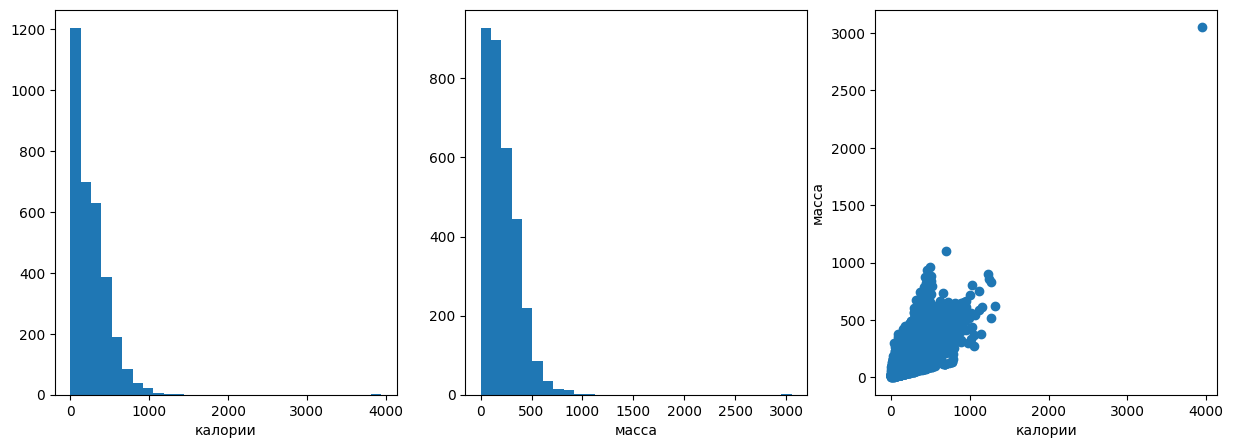

In [3]:
## Статистика по калорийности блюд в датасете

dishes_df = pd.read_csv('data/dish.csv')
ingr_df = pd.read_csv('data/ingredients.csv', index_col='id')

dishes_df['ingredients'] = dishes_df['ingredients'].apply(lambda x: [int(i.lstrip('ingr_0')) for i in x.split(';')])
dishes_df['ingredients'] = dishes_df['ingredients'].apply(lambda x: [ingr_df.loc[i].item() for i in x])

print(dishes_df.info(), '\n')

fig = plt.figure(figsize=(15,5))
axes = fig.subplots(1,3)

axes[0].hist(dishes_df['total_calories'], bins = 30)
axes[0].set(xlabel='калории')
axes[1].hist(dishes_df['total_mass'], bins = 30)
axes[1].set(xlabel='масса')
axes[2].scatter(dishes_df['total_calories'], dishes_df['total_mass'])
axes[2].set(xlabel='калории', ylabel = 'масса')

print(dishes_df.describe(percentiles = [0.25,0.5,0.75,0.95,0.99]), '\n')

fig.show()

(array([  1.,   0.,   0.,   0.,   0.,   4.,   2.,   9.,  10.,  13.,  15.,
         28.,  37.,  60.,  69., 142., 166., 189., 234., 238., 323., 282.,
        311., 360., 319., 241., 128.,  52.,  24.,   4.]),
 array([-5.37820388, -5.12146059, -4.8647173 , -4.607974  , -4.35123071,
        -4.09448741, -3.83774412, -3.58100083, -3.32425753, -3.06751424,
        -2.81077095, -2.55402765, -2.29728436, -2.04054106, -1.78379777,
        -1.52705448, -1.27031118, -1.01356789, -0.7568246 , -0.5000813 ,
        -0.24333801,  0.01340529,  0.27014858,  0.52689187,  0.78363517,
         1.04037846,  1.29712175,  1.55386505,  1.81060834,  2.06735164,
         2.32409493]),
 <BarContainer object of 30 artists>)

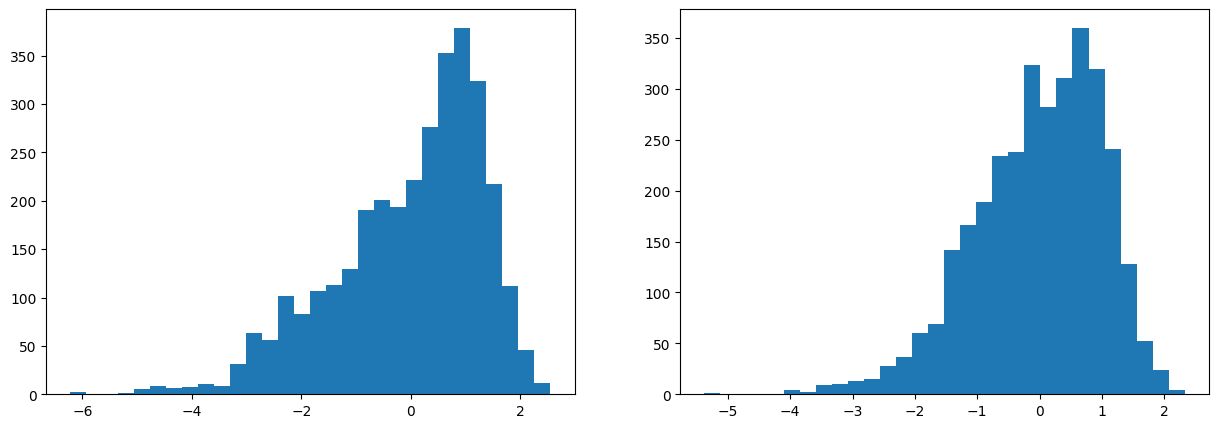

In [ ]:
## Масштабирование калорий (target) и массы 

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, StandardScaler
import joblib

## Удаляю 1 экстремальный выброс
dishes_df = dishes_df[dishes_df['total_calories'] <= 2000]

## Распределения калорий и массы с правым хвостом, поэтому перед нормализацией логарифмируем 
train_cals = dishes_df.loc[dishes_df['split'] == 'train', 'total_calories'].values.reshape(-1,1)
train_masses = dishes_df.loc[dishes_df['split'] == 'train', 'total_mass'].values.reshape(-1,1)

pipeline = Pipeline([
    ('log', FunctionTransformer(func=np.log1p, inverse_func=np.expm1, validate=True)),
    ('scale', StandardScaler())
])

cals_scaler = pipeline.fit(train_cals)
mass_scaler = pipeline.fit(train_masses)

joblib.dump(cals_scaler, 'data/cal_scaler.joblib')
joblib.dump(mass_scaler, 'data/mass_scaler.joblib')

fig = plt.figure(figsize=(15,5))
axes = fig.subplots(1,2)

cals_scaled = cals_scaler.transform(dishes_df['total_calories'].values.reshape(-1,1))
masses_scaled = mass_scaler.transform(dishes_df['total_mass'].values.reshape(-1,1))
axes[0].hist(cals_scaled, bins = 30)
axes[1].hist(masses_scaled, bins = 30)


In [ ]:
## В некоторых строках содержится deprecated (устаревший) в ['ingridients'], хотя есть фото
## Но таких строк не так много

dishes_df[dishes_df['ingredients'].apply(lambda x: 'deprecated' in x)].reset_index(drop = True)

dish_id  total_calories  total_mass  \
0   dish_1558372433       74.360001       143.0   
1   dish_1558114086       74.360001       143.0   
2   dish_1558027001       20.400002        68.0   
3   dish_1558373159     1013.337036       334.0   
4   dish_1558115364      485.260010       313.0   
5   dish_1558114875       74.360001       143.0   
6   dish_1558375506       73.839996       142.0   
7   dish_1558028142       21.900002        73.0   
8   dish_1558031019      206.442001       197.0   
9   dish_1558030724       18.300001        61.0   
10  dish_1558109945       74.360001       143.0   
11  dish_1558027243      263.364990       163.0   
12  dish_1558373074       73.839996       142.0   
13  dish_1558379876     1148.250977       374.0   
14  dish_1558115282       74.879997       144.0   
15  dish_1558379588       74.360001       143.0   
16  dish_1558376984      671.678040       350.0   
17  dish_1558028606       19.500000        65.0   
18  dish_1558122740      260.149994       304.0   
19  dish_1558116547       74.879997       144.0   
20  dish_1558115047      203.699997       212.0   
21  dish_1558380152       74.360001       143.0   
22  dish_1558375583      386.134003       251.0   
23  dish_1558031394      237.410004       318.0   
24  dish_1558114284      162.230011       316.0   
25  dish_1558028772       64.000000       192.0   
26  dish_1558031351       12.300000        41.0   
27  dish_1558376768       74.360001       143.0   
28  dish_1558372771      522.609985       311.0   
29  dish_1558380181      374.936005       313.0   
30  dish_1558028194      228.050003       172.0   

                                          ingredients  split  
0                                        [deprecated]  train  
1                                        [deprecated]   test  
2                                        [deprecated]  train  
3                      [sausage, deprecated, almonds]   test  
4              [potatoes, deprecated, almonds, bacon]  train  
5                                        [deprecated]  train  
6                                        [deprecated]  train  
7                                        [deprecated]  train  
8           [yam, bacon, deprecated, honeydew melons]  train  
9                                        [deprecated]  train  
10                                       [deprecated]  train  
11                           [deprecated, bacon, yam]  train  
12                                       [deprecated]   test  
13                     [deprecated, sausage, almonds]  train  
14                                       [deprecated]  train  
15                                       [deprecated]  train  
16  [almonds, deprecated, sausage, mixed greens, g...   test  
17                                       [deprecated]  train  
18  [grapes, mixed greens, deprecated, potatoes, b...  train  
19                                       [deprecated]  train  
20                [mixed greens, almonds, deprecated]  train  
21                                       [deprecated]  train  
22                [mixed greens, sausage, deprecated]  train  
23            [cantaloupe, deprecated, potatoes, yam]   test  
24                   [deprecated, grapes, cantaloupe]   test  
25          [deprecated, honeydew melons, cantaloupe]  train  
26                                       [deprecated]   test  
27                                       [deprecated]   test  
28             [deprecated, grapes, sausage, almonds]  train  
29                      [almonds, deprecated, grapes]  train  
30                      [bacon, deprecated, potatoes]  train

In [ ]:
## Самые частые ингридиенты - приправы, заправки
from collections import Counter
counter = Counter([item for sublist in dishes_df['ingredients'] for item in sublist])
counter.most_common(10)

[('olive oil', 1561),
 ('salt', 1378),
 ('garlic', 946),
 ('pepper', 723),
 ('vinegar', 713),
 ('onions', 685),
 ('lemon juice', 572),
 ('arugula', 506),
 ('parsley', 493),
 ('cherry tomatoes', 480)]

In [16]:
## Самые редкие ингридиенты 
## Есть сложные ингридиенты, которые можно считать отдельным блюдом, напр. chiken salad, pasta salad, sandwiches

[(key,value) for key,value in counter.most_common() if value <= 5]

[('tortilla chips', 5),
 ('chicken salad', 5),
 ('tuna salad', 5),
 ('sandwiches', 5),
 ('greek salad', 5),
 ('frozen yogurt', 4),
 ('sunflower seeds', 4),
 ('chilaquiles', 4),
 ('baby carrots', 3),
 ('grapefruit juice', 3),
 ('cereal', 3),
 ('tempeh', 3),
 ('plate only', 2),
 ('pepperoni', 2),
 ('succotash', 2),
 ('ice cream cones', 2),
 ('cod', 2),
 ('pasta salad', 2),
 ('fruit salad', 2),
 ('syrup', 1),
 ('bread', 1),
 ('brown sugar', 1),
 ('mozzarella cheese', 1),
 ('orange with peel', 1),
 ('banana with peel', 1),
 ('wheat bread', 1),
 ('balsamic vinegar', 1),
 ('toast', 1)]

In [ ]:
## Ингридиенты по группам калорийности

dct = {}
dishes_df['cuts'] = pd.cut(dishes_df['total_calories'], bins = [-1,200,400,600, 1e10])
for cut in sorted(dishes_df['cuts'].unique()): 
    df_ = dishes_df[dishes_df['cuts']==cut]
    all_ings = [item for sublist in df_['ingredients'] for item in sublist]
    ings = Counter(all_ings).most_common()[5:30]
    dct[str(cut)] = ings

pd.DataFrame(dct)

## В некоторых ингридиентах есть скобки, уточняющие состояние ингридиента
    

(-1.0, 200.0]          (200.0, 400.0]          (400.0, 600.0]  \
0   (cherry tomatoes, 174)          (vinegar, 254)          (vinegar, 164)   
1            (carrot, 158)      (lemon juice, 237)      (lemon juice, 158)   
2           (mustard, 154)          (arugula, 212)          (parsley, 133)   
3            (onions, 148)          (parsley, 203)          (arugula, 120)   
4           (arugula, 138)         (shallots, 172)         (shallots, 119)   
5      (mixed greens, 125)  (cherry tomatoes, 156)  (cherry tomatoes, 109)   
6          (broccoli, 123)    (spinach (raw), 154)           (carrot, 108)   
7         (cucumbers, 121)           (carrot, 130)    (spinach (raw), 104)   
8     (spinach (raw), 117)     (cheese pizza, 128)          (broccoli, 99)   
9       (cauliflower, 105)            (thyme, 124)             (thyme, 91)   
10          (parsley, 102)         (broccoli, 124)       (wheat berry, 87)   
11       (lemon juice, 97)      (wheat berry, 119)           (chicken, 84)   
12             (apple, 88)       (white rice, 113)        (white rice, 74)   
13           (berries, 86)          (chicken, 113)           (mustard, 74)   
14        (cantaloupe, 84)          (mustard, 107)              (pork, 72)   
15            (olives, 80)        (cucumbers, 101)         (jalapenos, 72)   
16             (chard, 78)         (bok choy, 100)        (brown rice, 71)   
17       (blueberries, 71)             (lime, 100)         (cucumbers, 68)   
18            (grapes, 66)      (mixed greens, 94)          (bok choy, 67)   
19         (pineapple, 63)            (millet, 92)      (mixed greens, 65)   
20             (bacon, 63)    (scrambled eggs, 90)              (beef, 62)   
21      (sweet potato, 61)         (jalapenos, 89)      (cheese pizza, 59)   
22      (bell peppers, 60)            (squash, 88)              (lime, 57)   
23   (corn on the cob, 58)      (sweet potato, 87)      (bell peppers, 54)   
24           (lettuce, 56)             (chard, 82)            (millet, 52)   

   (600.0, 10000000000.0]  
0           (vinegar, 83)  
1       (lemon juice, 80)  
2           (chicken, 76)  
3          (shallots, 63)  
4     (spinach (raw), 61)  
5           (parsley, 55)  
6          (broccoli, 52)  
7             (thyme, 50)  
8       (wheat berry, 43)  
9        (brown rice, 42)  
10  (cherry tomatoes, 41)  
11            (chili, 40)  
12        (cucumbers, 39)  
13          (mustard, 39)  
14           (carrot, 36)  
15          (arugula, 36)  
16     (mixed greens, 35)  
17             (lime, 34)  
18             (beef, 34)  
19       (white rice, 33)  
20         (cilantro, 32)  
21        (jalapenos, 31)  
22          (almonds, 31)  
23     (bell peppers, 31)  
24           (olives, 29)

In [18]:
import os 
all([os.path.isfile(f'data/images/{idd}/rgb.png') for idd in dishes_df['dish_id']])

### Для всех блюд есть фото

True

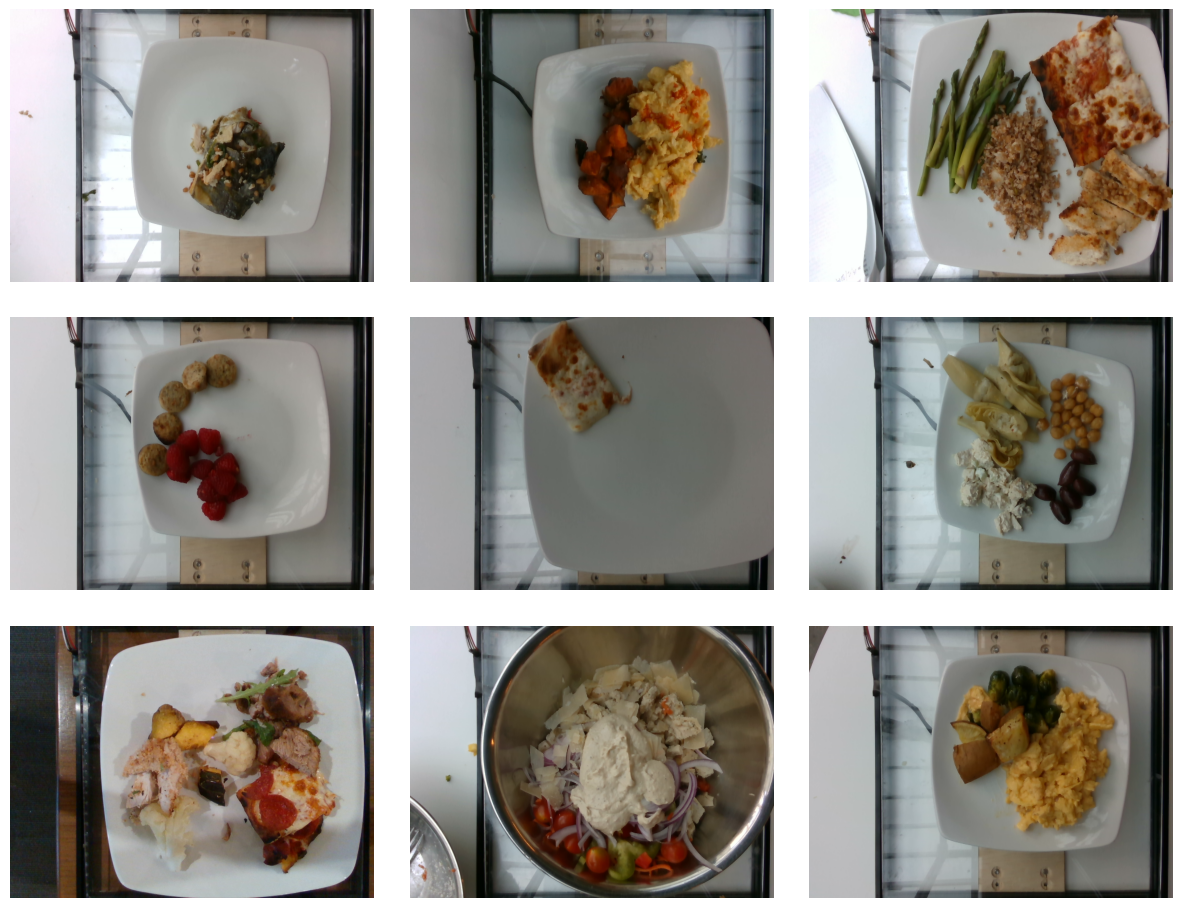

In [19]:
## Примеры фото
from PIL import Image

fig = plt.figure(figsize=(15, 12))

for i,dish_id in enumerate(dishes_df['dish_id'].sample(9)): 
    ax = fig.add_subplot(3,3,i+1)
    img = Image.open(f'data/images/{dish_id}/rgb.png')
    ax.imshow(img)
    ax.axis('off')

fig.subplots_adjust(wspace=0.1, hspace=0.001)

In [20]:
## Train-test
dishes_df.groupby('split').count()

dish_id  total_calories  total_mass  ingredients  cuts
split                                                        
test       507             507         507          507   507
train     2754            2754        2754         2754  2754

### Выводы из EDA: 
- Нужно включать массу блюда в признаки модели, причем как один из самых важных признаков. 

- Описание блюда представлено как список ингридиентов. Можно было бы использовать word2vec или просто Embedding-слой, но некоторые ингридиенты описаны словосочетаниями, нужно отличать white rice от brown rice. Поэтому имеет смысл использовать легкий трансформер, возможно, с fine-tuning, или RNN. Не имеет смысла использовать большие модели, поскольку задача не требует понимания смысла текста. 
- Для всех блюд есть фото, используем предобученную сверточную модель. В датасете всего 2755 фото, нужно использовать более-менее "агрессивные" аугментации изображений. Пользователи будут делать фото с разных углов и ракурсов (афинные аугментации), с разным качеством (артефактные), при разном освещении (цветовые).  
- Модель будет состоять из трех блоков - текстовый, сверточный и блок "уcвоения" массы блюда (возможно, небольшой линейный слой). В классификатор будут подаваться конкатенированные эмбеддинги трех блоков, в качестве функции потерь используем MSE или MAE (задача регрессии). 

### Смотрю на аугментации

In [ ]:
from scripts.dataset import MultimodalDataset, get_transforms, collate_fn
from scripts.config import Config
import joblib

config = Config()
train_transforms = get_transforms(config, ds_type="train")
val_transforms = get_transforms(config, ds_type="val")

cals_scaler = joblib.load('data/cal_scaler.joblib')
masses_scaler = joblib.load('data/mass_scaler.joblib')

train_ds = MultimodalDataset(config, train_transforms, cals_scaler, masses_scaler, ds_type="train")
val_ds = MultimodalDataset(config, val_transforms, cals_scaler, masses_scaler, ds_type="val")

/home/ubuntu/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/ubuntu/scripts/dataset.py:93: UserWarning: Argument(s) 'quality_lower, quality_upper' are not valid for transform ImageCompression
  A.ImageCompression(quality_lower=60, quality_upper=80, p=1.0),


0 -- shallots, garlic, lemon juice, onions, spinach (raw), jalapenos, pineapple, cauliflower, honeydew melons, chili, salt, olive oil, lime, ginger, brown rice, cilantro, salmon
1 -- scrambled eggs, strawberries, olive oil, salt, pepper, sweet potato, brussels sprouts
2 -- cherry tomatoes, onions, olives, carrot
3 -- garlic, wine, pasta, spinach (raw), cream, sour cream, cauliflower, shallots, salmon, pineapple, ginger, jalapenos, brown rice, beef, mushroom, thyme, salt, olive oil, lemon juice, onions, lime, cilantro, chili, honeydew melons
4 -- olive oil, vinegar, radishes, bacon, garlic, bell peppers, scrambled eggs, salt, cucumbers, mustard, hash browns
5 -- pepper, arugula, cream, caesar salad, butter, shallots, cheese pizza, salt, garlic, lemon juice, basil, mushroom, wheat berry, oregano, thyme, olive oil, rosemary, white wine, chicken
6 -- olive oil, blueberries, pepper, vinegar, arugula, walnuts, salt, almonds, mushroom, green beans, spinach (raw), carrot, mustard, parsley, cha

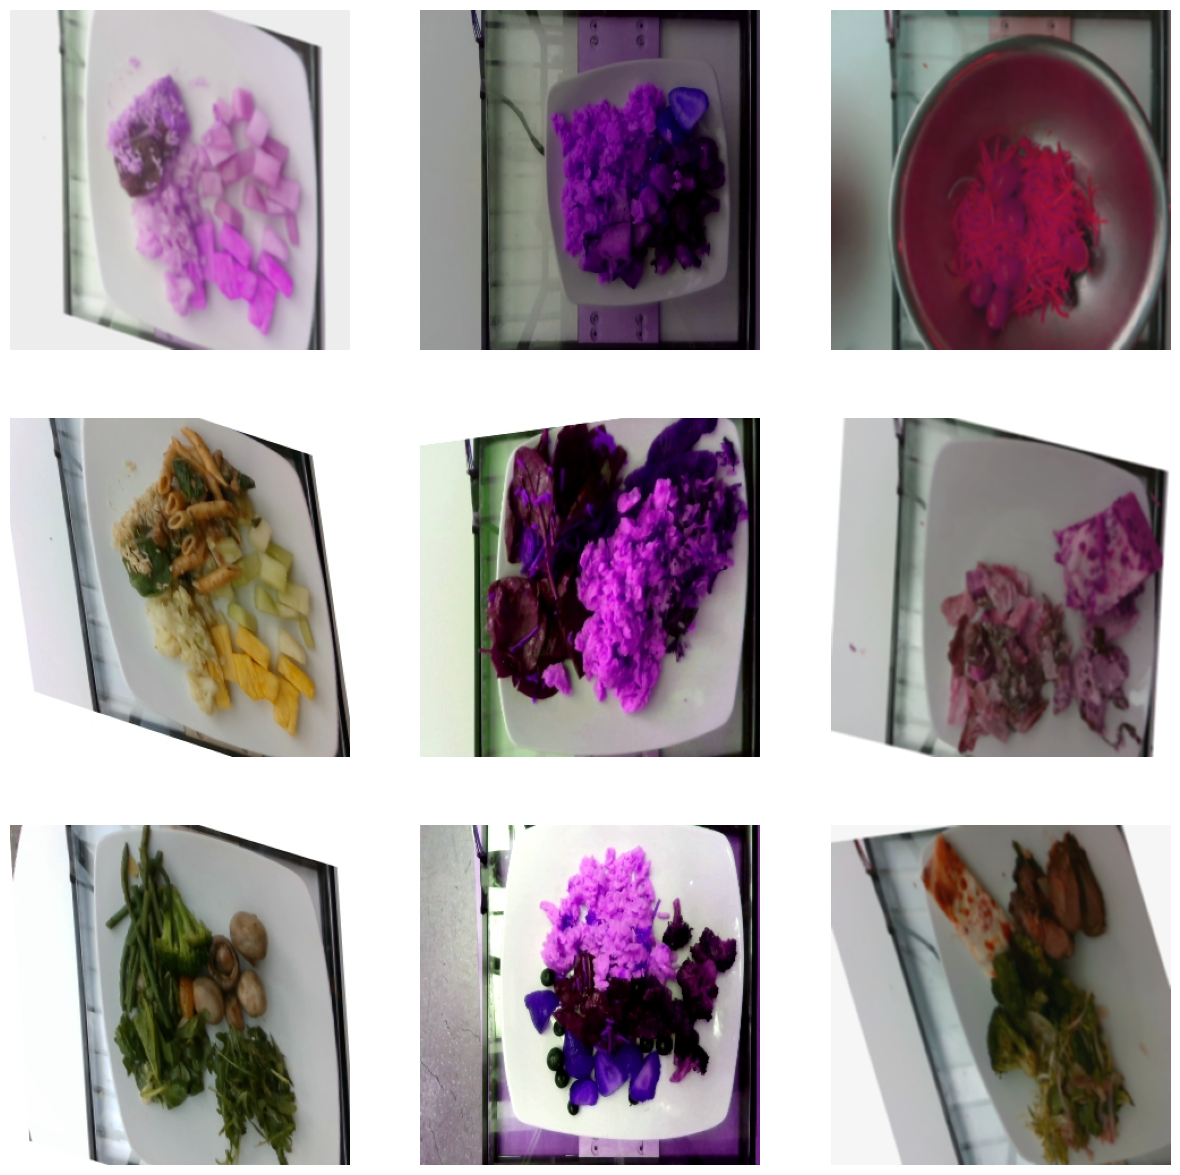

In [ ]:
fig = plt.figure(figsize=(15,15))
for i, idx in enumerate(np.random.randint(0,500,(9,))): 
    text = train_ds[idx]['text']
    print(i, '--', text)
    image = train_ds[idx]['image']
    ax = fig.add_subplot(3,3,i+1)
    ax.imshow(np.transpose(image, (1,2,0)))
    ax.axis('off')

fig.show()


## Обучение

In [1]:
from scripts.utils import train
from scripts.config import Config
import torch

cfg = Config()
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

train(cfg, device) 

/home/ubuntu/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


cuda


/home/ubuntu/scripts/dataset.py:94: UserWarning: Argument(s) 'quality_lower, quality_upper' are not valid for transform ImageCompression
  A.ImageCompression(quality_lower=60, quality_upper=80, p=1.0),


training started


100%|██████████| 87/87 [01:07<00:00,  1.28it/s]


Epoch 0/99 | avg_loss: 1.3624 | val_mae: 103.1803


100%|██████████| 87/87 [01:03<00:00,  1.37it/s]


Epoch 1/99 | avg_loss: 0.5576 | val_mae: 98.1721


100%|██████████| 87/87 [01:03<00:00,  1.37it/s]


Epoch 2/99 | avg_loss: 0.3558 | val_mae: 78.3268


100%|██████████| 87/87 [01:03<00:00,  1.37it/s]


Epoch 3/99 | avg_loss: 0.2809 | val_mae: 64.1488


100%|██████████| 87/87 [01:03<00:00,  1.37it/s]


Epoch 4/99 | avg_loss: 0.2588 | val_mae: 69.9084


100%|██████████| 87/87 [01:03<00:00,  1.38it/s]


Epoch 5/99 | avg_loss: 0.2383 | val_mae: 67.9757


100%|██████████| 87/87 [01:03<00:00,  1.37it/s]


Epoch 6/99 | avg_loss: 0.2221 | val_mae: 70.9723


100%|██████████| 87/87 [01:03<00:00,  1.37it/s]


Epoch 7/99 | avg_loss: 0.2082 | val_mae: 73.0070


100%|██████████| 87/87 [01:03<00:00,  1.37it/s]


Epoch 8/99 | avg_loss: 0.2371 | val_mae: 58.4089


100%|██████████| 87/87 [01:03<00:00,  1.37it/s]


Epoch 9/99 | avg_loss: 0.1770 | val_mae: 67.6895


100%|██████████| 87/87 [01:03<00:00,  1.37it/s]


Epoch 10/99 | avg_loss: 0.2020 | val_mae: 72.6411
Разморожен слой: transformer.layer.4.attention.q_lin.weight
Разморожен слой: transformer.layer.4.attention.q_lin.bias
Разморожен слой: transformer.layer.4.attention.k_lin.weight
Разморожен слой: transformer.layer.4.attention.k_lin.bias
Разморожен слой: transformer.layer.4.attention.v_lin.weight
Разморожен слой: transformer.layer.4.attention.v_lin.bias
Разморожен слой: transformer.layer.4.attention.out_lin.weight
Разморожен слой: transformer.layer.4.attention.out_lin.bias
Разморожен слой: transformer.layer.4.sa_layer_norm.weight
Разморожен слой: transformer.layer.4.sa_layer_norm.bias
Разморожен слой: transformer.layer.4.ffn.lin1.weight
Разморожен слой: transformer.layer.4.ffn.lin1.bias
Разморожен слой: transformer.layer.4.ffn.lin2.weight
Разморожен слой: transformer.layer.4.ffn.lin2.bias
Разморожен слой: transformer.layer.4.output_layer_norm.weight
Разморожен слой: transformer.layer.4.output_layer_norm.bias
Разморожен слой: transformer.l

100%|██████████| 173/173 [01:27<00:00,  1.98it/s]


Epoch 11/99 | avg_loss: 0.1994 | val_mae: 51.1796


100%|██████████| 173/173 [01:26<00:00,  2.00it/s]


Epoch 12/99 | avg_loss: 0.1393 | val_mae: 49.8535


100%|██████████| 173/173 [01:26<00:00,  2.01it/s]


Epoch 13/99 | avg_loss: 0.1172 | val_mae: 51.7417


100%|██████████| 173/173 [01:26<00:00,  2.01it/s]


Epoch 14/99 | avg_loss: 0.1083 | val_mae: 44.4106


100%|██████████| 173/173 [01:25<00:00,  2.01it/s]


Epoch 15/99 | avg_loss: 0.0846 | val_mae: 42.9655


100%|██████████| 173/173 [01:26<00:00,  2.01it/s]


Epoch 16/99 | avg_loss: 0.0797 | val_mae: 41.4755


100%|██████████| 173/173 [01:26<00:00,  2.00it/s]


Epoch 17/99 | avg_loss: 0.0708 | val_mae: 41.3411


100%|██████████| 173/173 [01:26<00:00,  2.01it/s]


Epoch 18/99 | avg_loss: 0.0668 | val_mae: 39.6738


100%|██████████| 173/173 [01:26<00:00,  2.00it/s]


Epoch 19/99 | avg_loss: 0.0621 | val_mae: 52.2032


100%|██████████| 173/173 [01:26<00:00,  2.00it/s]


Epoch 20/99 | avg_loss: 0.0609 | val_mae: 39.1397


100%|██████████| 173/173 [01:26<00:00,  2.00it/s]


Epoch 21/99 | avg_loss: 0.0553 | val_mae: 37.0472


100%|██████████| 173/173 [01:26<00:00,  2.01it/s]


Epoch 22/99 | avg_loss: 0.0486 | val_mae: 37.7988


100%|██████████| 173/173 [01:26<00:00,  2.01it/s]


Epoch 23/99 | avg_loss: 0.0493 | val_mae: 43.5833


100%|██████████| 173/173 [01:26<00:00,  2.00it/s]


Epoch 24/99 | avg_loss: 0.0512 | val_mae: 38.5010


100%|██████████| 173/173 [01:26<00:00,  2.00it/s]


Epoch 25/99 | avg_loss: 0.0463 | val_mae: 36.3224


100%|██████████| 173/173 [01:26<00:00,  2.00it/s]


Epoch 26/99 | avg_loss: 0.0436 | val_mae: 38.2076


100%|██████████| 173/173 [01:26<00:00,  2.00it/s]


Epoch 27/99 | avg_loss: 0.0377 | val_mae: 43.2034


100%|██████████| 173/173 [01:26<00:00,  2.00it/s]


Epoch 28/99 | avg_loss: 0.0369 | val_mae: 35.9369


100%|██████████| 173/173 [01:25<00:00,  2.01it/s]


Epoch 29/99 | avg_loss: 0.0387 | val_mae: 40.9805


100%|██████████| 173/173 [01:26<00:00,  2.00it/s]


Epoch 30/99 | avg_loss: 0.0361 | val_mae: 34.7909


100%|██████████| 173/173 [01:26<00:00,  2.00it/s]


Epoch 31/99 | avg_loss: 0.0329 | val_mae: 38.2529


100%|██████████| 173/173 [01:26<00:00,  2.00it/s]


Epoch 32/99 | avg_loss: 0.0357 | val_mae: 35.0156


100%|██████████| 173/173 [01:26<00:00,  2.01it/s]


Epoch 33/99 | avg_loss: 0.0306 | val_mae: 36.8481


100%|██████████| 173/173 [01:26<00:00,  2.00it/s]


Epoch 34/99 | avg_loss: 0.0322 | val_mae: 36.3488


100%|██████████| 173/173 [01:26<00:00,  2.01it/s]


Epoch 35/99 | avg_loss: 0.0301 | val_mae: 36.7250


100%|██████████| 173/173 [01:26<00:00,  2.00it/s]


Epoch 36/99 | avg_loss: 0.0302 | val_mae: 34.4734


100%|██████████| 173/173 [01:26<00:00,  2.00it/s]


Epoch 37/99 | avg_loss: 0.0278 | val_mae: 33.9460


100%|██████████| 173/173 [01:26<00:00,  2.00it/s]


Epoch 38/99 | avg_loss: 0.0323 | val_mae: 41.7683


100%|██████████| 173/173 [01:26<00:00,  2.01it/s]


Epoch 39/99 | avg_loss: 0.0304 | val_mae: 34.4322


100%|██████████| 173/173 [01:26<00:00,  2.00it/s]


Epoch 40/99 | avg_loss: 0.0264 | val_mae: 38.9085


100%|██████████| 173/173 [01:26<00:00,  1.99it/s]


Epoch 41/99 | avg_loss: 0.0289 | val_mae: 34.6787


100%|██████████| 173/173 [01:26<00:00,  2.00it/s]


Epoch 42/99 | avg_loss: 0.0241 | val_mae: 33.8067


100%|██████████| 173/173 [01:26<00:00,  2.00it/s]


Epoch 43/99 | avg_loss: 0.0248 | val_mae: 34.1642


100%|██████████| 173/173 [01:26<00:00,  2.00it/s]


Epoch 44/99 | avg_loss: 0.0266 | val_mae: 35.3218


100%|██████████| 173/173 [01:26<00:00,  2.00it/s]


Epoch 45/99 | avg_loss: 0.0229 | val_mae: 35.6939


100%|██████████| 173/173 [01:26<00:00,  2.01it/s]


Epoch 46/99 | avg_loss: 0.0283 | val_mae: 36.0263


100%|██████████| 173/173 [01:26<00:00,  2.01it/s]


Epoch 47/99 | avg_loss: 0.0236 | val_mae: 37.9732


100%|██████████| 173/173 [01:26<00:00,  2.00it/s]


Epoch 48/99 | avg_loss: 0.0223 | val_mae: 33.2196


100%|██████████| 173/173 [01:26<00:00,  2.00it/s]


Epoch 49/99 | avg_loss: 0.0209 | val_mae: 43.7762


100%|██████████| 173/173 [01:26<00:00,  2.00it/s]


Epoch 50/99 | avg_loss: 0.0237 | val_mae: 35.3948


100%|██████████| 173/173 [01:26<00:00,  2.00it/s]


Epoch 51/99 | avg_loss: 0.0231 | val_mae: 35.7003


100%|██████████| 173/173 [01:26<00:00,  2.00it/s]


Epoch 52/99 | avg_loss: 0.0197 | val_mae: 35.0655


100%|██████████| 173/173 [01:26<00:00,  2.00it/s]


Epoch 53/99 | avg_loss: 0.0205 | val_mae: 33.9101


100%|██████████| 173/173 [01:26<00:00,  2.00it/s]


Epoch 54/99 | avg_loss: 0.0210 | val_mae: 35.1463
Early stopping at epoch 54


## Валидация на тесте, анализ примеров

In [13]:
from scripts.utils import MultimodalModel, validate
from scripts.dataset import MultimodalDataset, collate_fn, get_transforms
import pandas as pd
import joblib
from torch.utils.data import DataLoader
from functools import partial
from transformers import AutoTokenizer
import numpy as np

test_df = pd.read_csv('data/dish.csv')
ingr_df = pd.read_csv('data/ingredients.csv', index_col='id')
test_df['ingredients'] = test_df['ingredients'].apply(lambda x: [int(i.lstrip('ingr_0')) for i in x.split(';')])
test_df['ingredients'] = test_df['ingredients'].apply(lambda x: [ingr_df.loc[i].item() for i in x])
test_df = test_df[test_df['total_calories'] <= 2000]
test_df = test_df[test_df['split'] == 'test']

model = MultimodalModel(cfg).to(device)
model.load_state_dict(torch.load('models/best_model.pth'))

val_transforms = get_transforms(cfg, ds_type="val")
cals_scaler = joblib.load('data/cal_scaler.joblib')
masses_scaler = joblib.load('data/mass_scaler.joblib')

val_dataset = MultimodalDataset(cfg, val_transforms, cals_scaler, masses_scaler, ds_type="val")

tokenizer = AutoTokenizer.from_pretrained(cfg.TEXT_MODEL_NAME)
val_loader = DataLoader(val_dataset,
                        batch_size=cfg.BATCH_SIZE,
                        shuffle=False,
                        collate_fn=partial(collate_fn,
                                            tokenizer=tokenizer))

preds, _ = validate(model, val_loader, cals_scaler, device)

test_df['model_preds'] = preds
final_mae = np.mean(np.abs(test_df['total_calories'] - test_df['model_preds']))
print(f'\n\n FINAL_MAE: {final_mae:3f} \n\n')
test_df.head()



 FINAL_MAE: 35.146292 




dish_id  total_calories  total_mass  \
0   dish_1561662216      300.794281       193.0   
2   dish_1562008979      382.936646       290.0   
16  dish_1561739238      274.190002       257.0   
23  dish_1562691032      419.681702       415.0   
26  dish_1558549773        2.300000        10.0   

                                          ingredients split  model_preds  
0   [soy sauce, garlic, white rice, parsley, onion...  test   358.031097  
2   [jalapenos, lemon juice, pork, wheat berry, ca...  test   387.456635  
16   [egg whites, hash browns, berries, sweet potato]  test   208.851929  
23  [berries, olive oil, pineapple, scrambled eggs...  test   374.631958  
26                                    [spinach (raw)]  test     2.491011

### Худшие предсказания

['carrot', 'goat cheese', 'olive oil', 'broccoli', 'spinach (raw)', 'chicken']  416.0 g, 902.2 calories, 
 model predicted 533.8 calories


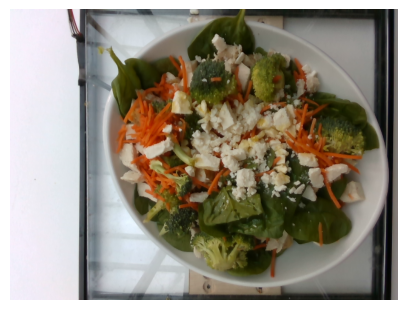

['cherry tomatoes', 'pizza', 'chicken', 'pineapple']  488.0 g, 927.8 calories, 
 model predicted 586.0 calories


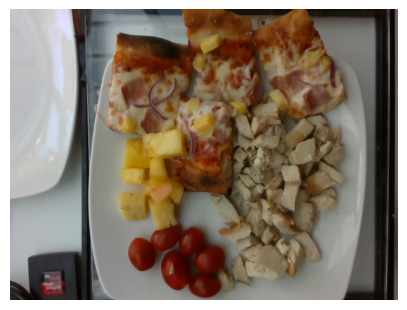

['pizza', 'cherry tomatoes', 'chicken', 'pineapple', 'olives']  500.0 g, 941.6 calories, 
 model predicted 601.4 calories


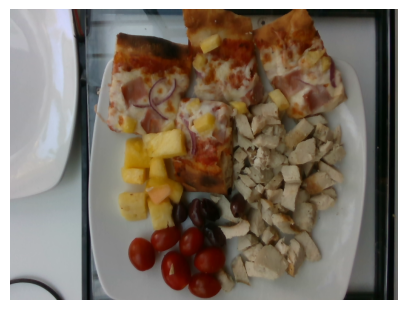

['almonds', 'white rice', 'spinach (raw)']  203.0 g, 782.0 calories, 
 model predicted 467.6 calories


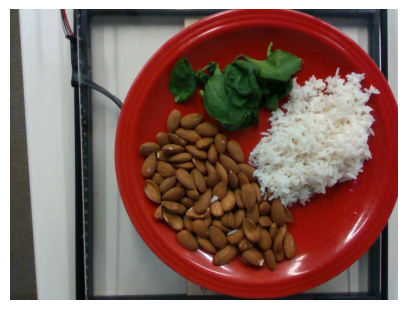

['salt', 'squash', 'carrot', 'tuna salad', 'olive oil']  418.0 g, 490.4 calories, 
 model predicted 204.7 calories


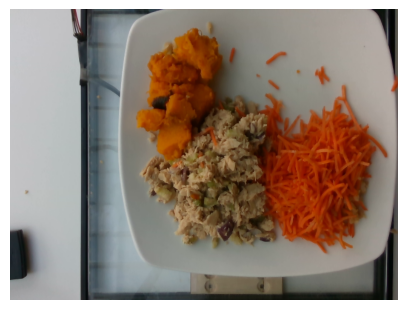

In [28]:
from PIL import Image

test_df['err'] = test_df['total_calories'] - test_df['model_preds']
test_df['abs_err'] = np.abs(test_df['err'])
worst_preds = test_df.sort_values(by='abs_err', ascending=False).iloc[:5]

for i, row in worst_preds.iterrows(): 
    print(f'{row["ingredients"]}  {row["total_mass"]} g, {row["total_calories"]:.1f} calories, \n model predicted {row["model_preds"]:.1f} calories')
    fig, ax = plt.subplots(figsize=(5,5))
    img = Image.open(f'data/images/{row["dish_id"]}/rgb.png')
    ax.imshow(img)
    ax.axis('off')
    plt.show()

### Лучшие предсказания 

['strawberries']  21.0 g, 6.9 calories, 
 model predicted 6.9 calories


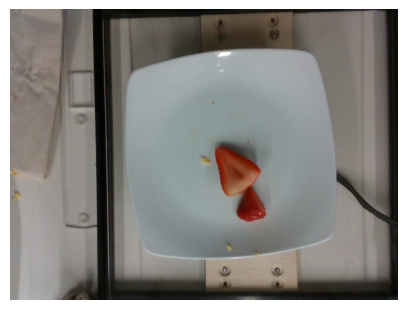

['brussels sprouts', 'salt', 'pepper', 'olive oil']  66.0 g, 33.7 calories, 
 model predicted 33.7 calories


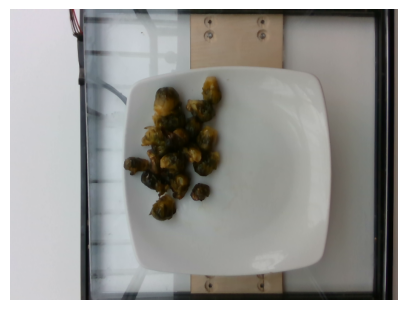

['lettuce', 'mixed greens', 'lime', 'salt', 'cucumbers', 'onions', 'olive oil', 'vinegar', 'pepper', 'cherry tomatoes']  62.0 g, 62.6 calories, 
 model predicted 62.6 calories


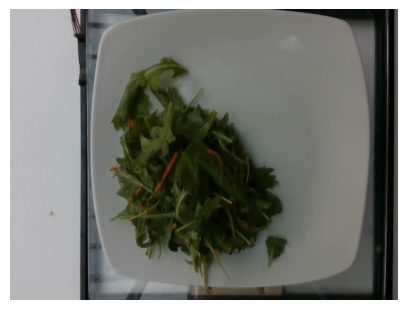

['cream cheese', 'bagels']  72.0 g, 194.4 calories, 
 model predicted 194.5 calories


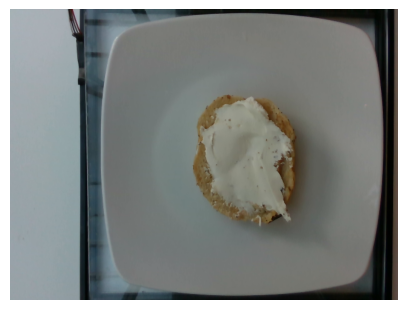

['pineapple']  49.0 g, 24.5 calories, 
 model predicted 24.4 calories


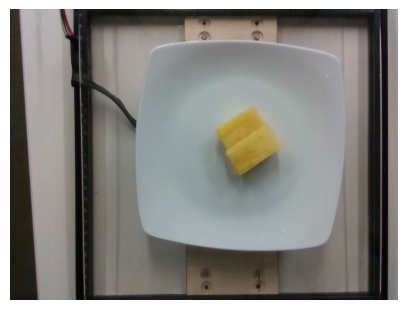

In [30]:
best_preds = test_df.sort_values(by='abs_err', ascending=True).iloc[:5]

for i, row in best_preds.iterrows(): 
    print(f'{row["ingredients"]}  {row["total_mass"]} g, {row["total_calories"]:.1f} calories, \n model predicted {row["model_preds"]:.1f} calories')
    fig, ax = plt.subplots(figsize=(5,5))
    img = Image.open(f'data/images/{row["dish_id"]}/rgb.png')
    ax.imshow(img)
    ax.axis('off')
    plt.show()

## Выводы

Из худших предсказаний: 
 - Первое блюдо совершенно не выглядит на 900 калорий, только если там не 500 г. твердого сыра и столько же оливкового масла.
 - 2 и 3 блюда (дубликаты) содержат так много калорий из за кусков пиццы, которые занимают 1/4 тарелки. Остальная часть тарелки содержит низкокалорийные продукты. 
 - 4 блюдо содержит много калорий из-за большого кол-ва орехов. 
 - 5 блюдо тоже "не выглядит" калорийным, хотя, возможно, там много масла. 

 Из лучших предсказаний видно, что модель отлично справляется с простыми блюдами, состоящими из одного/нескольких "одиночных" ингридиентов. 

 Обобщая, модель плохо различает вклад отдельных ингридиентов в калорийность сложного блюда, когда один ингридиент небольшого объема вносит основной вклад в общую калорийность. При этом нужно учитывать, что у модели нет информации о весе отдельных ингридиентов (хотя тогда зачем вообще нейросетейвая модель?). 
 Также учитывая, что, как показал EDA, очень калорийное оливковое масло есть практически во всех блюдах, модель может не обращать внимания на этот ингридиент в списке, а на фото его не особо видно. 

 Нужно "натаскивать" модель на "опасные" ингридиенты и их количество на тарелке, скорее всего, через дообучение сверточной части. В идеальном случае модель должна, например, видеть сколько именно "капель масла" на тарелке. 

